In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform as tf
from skimage.io import imread, imsave
from glob import glob

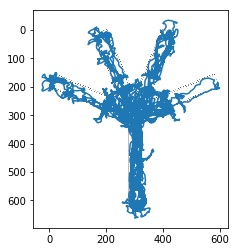

In [79]:
epoch_name = 'EE8_03_20180516_2Track.1'
all_dsts = pd.read_hdf('./trackfiles/TrackDeepCut_resnet50_4armtrackOct14shuffle1_50000.h5')
dst = all_dsts.values[374,:].reshape((4,3))[:,0:2]
src = np.loadtxt('ideal_track_position.csv',delimiter=',')
dst_img = imread('./4ArmTrack/EE8_03_20180516_2Track.1_frame1.png')
src_img = imread('./trackfiles/Track.png')
traj_raw = pd.read_hdf('./trackfiles/EE8_03_20180516_2Track.1DeepCut_resnet101_trackingledsAug13shuffle1_500000.h5')
tform = tf.ProjectiveTransform()
tform.estimate(src, dst)
traj_raw_array = traj_raw.values.reshape(-1,2,3)[:,:,0:2].mean(axis=1)
traj = tform.inverse(traj_raw_array)
plt.figure()
plt.imshow(src_img)
plt.plot(traj[:,0],traj[:,1])
plt.show()
np.savetxt('./EE8_03_20180516_2Track.1.projected.csv',traj,delimiter=',')